In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv('main_data.csv')

In [5]:
data.head()

,Unnamed: 0,country,"fy2017, Dealing with construction permits","fy2019, Dealing with construction permits","fy2018, Dealing with construction permits"
0,0,AFG,33.70269,34.53602,34.53602
1,1,AGO,64.57157,65.32993,64.99177
2,2,ALB,52.60171,52.67715,52.64734
3,3,ARE,86.51006,89.75407,86.52729
4,4,ARG,48.96341,56.44015,49.26822


In [6]:
data.tail()

,Unnamed: 0,country,"fy2017, Dealing with construction permits","fy2019, Dealing with construction permits","fy2018, Dealing with construction permits"
186,186,XKX,50.29844,55.28702,52.87432
187,187,YEM,0.00000,0.00000,0.00000
188,188,ZAF,68.26741,68.32331,68.24925
189,189,ZMB,71.10859,72.09460,71.72488
190,190,ZWE,46.39289,60.00173,48.55427


In [7]:
data.describe()

,Unnamed: 0,"fy2017, Dealing with construction permits","fy2019, Dealing with construction permits","fy2018, Dealing with construction permits"
count,191.0000,191.000000,191.000000,191.000000
mean,95.0000,63.269214,65.845667,64.770344
std,55.2811,16.622900,15.815424,15.707923
min,0.0000,0.000000,0.000000,0.000000
25%,47.5000,56.300935,59.640150,57.710025
50%,95.0000,66.694200,68.683240,67.943670
75%,142.5000,73.407800,75.182955,73.913715
max,190.0000,91.210020,93.467020,91.241050


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 5 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Unnamed: 0                                 191 non-null    int64  
 1   country                                    191 non-null    object 
 2   fy2017, Dealing with construction permits  191 non-null    float64
 3   fy2019, Dealing with construction permits  191 non-null    float64
 4   fy2018, Dealing with construction permits  191 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 7.6+ KB


In [9]:
data.isnull().sum()

Unnamed: 0                                   0
country                                      0
fy2017, Dealing with construction permits    0
fy2019, Dealing with construction permits    0
fy2018, Dealing with construction permits    0
dtype: int64

In [10]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

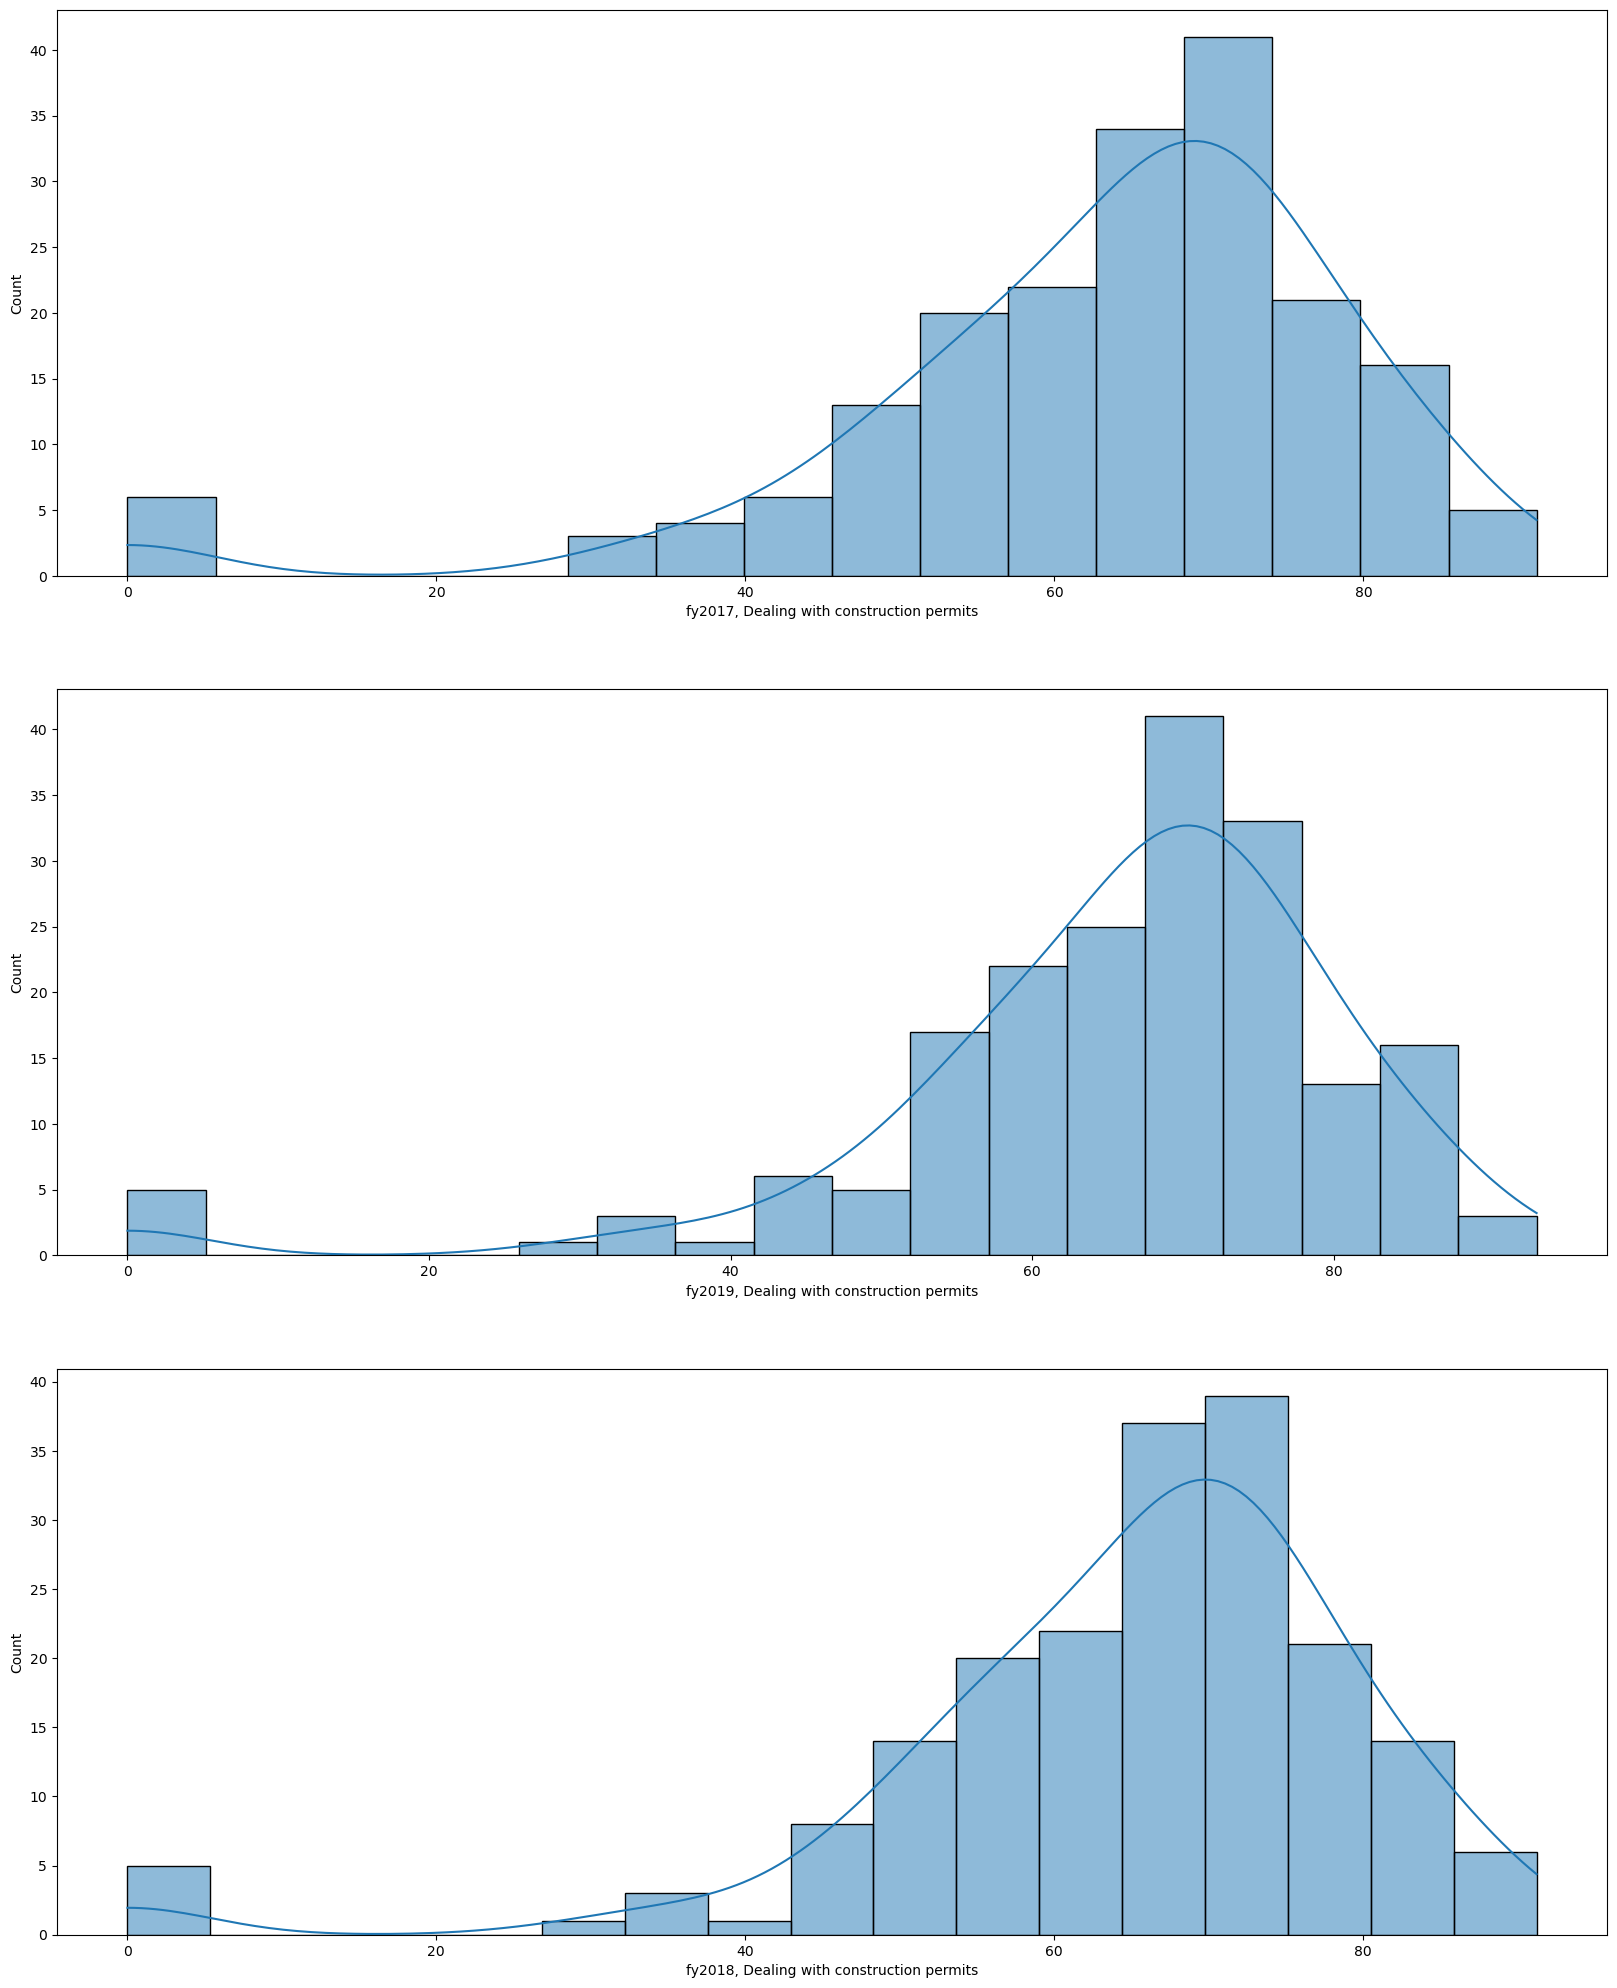

In [11]:
plt.figure(figsize=(20,25),facecolor='white')
for i in range(1,4):
    plt.subplot(3,1,i)
    sns.histplot(data.iloc[:,i],kde=True)
    

In [12]:
x=data.iloc[:,1:]
x.head()

,"fy2017, Dealing with construction permits","fy2019, Dealing with construction permits","fy2018, Dealing with construction permits"
0,33.70269,34.53602,34.53602
1,64.57157,65.32993,64.99177
2,52.60171,52.67715,52.64734
3,86.51006,89.75407,86.52729
4,48.96341,56.44015,49.26822


THE ELBOW TECHNIQUE

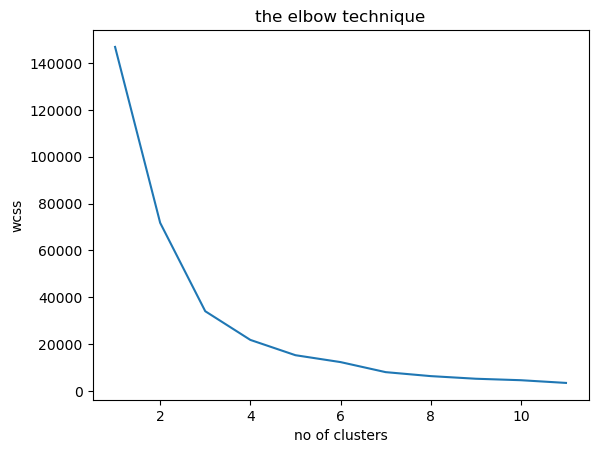

In [16]:
from sklearn.cluster import KMeans 
import warnings
warnings.filterwarnings('ignore')
wcss=[]
for i in range(1,12):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,12),wcss)
plt.title('the elbow technique')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()
    

no of clusters=3

In [17]:
model=KMeans(n_clusters=3,random_state=42)

In [18]:
model.fit(x)

KMeans(n_clusters=3, random_state=42)

In [28]:
label=model.labels_
label

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 2, 2, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       2, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0], dtype=int32)

In [22]:
model.cluster_centers_

array([[51.37082446, 56.48001462, 54.70178385],
       [72.63648108, 73.969857  , 73.22151008],
       [ 4.82308667,  4.82308667,  4.82308667]])

In [29]:
from collections import Counter

In [30]:
Counter(label)

Counter({np.int32(1): 120, np.int32(0): 65, np.int32(2): 6})

In [31]:
data['labels']=label
data

,country,"fy2017, Dealing with construction permits","fy2019, Dealing with construction permits","fy2018, Dealing with construction permits",labels
0,AFG,33.70269,34.53602,34.53602,0
1,AGO,64.57157,65.32993,64.99177,1
2,ALB,52.60171,52.67715,52.64734,0
3,ARE,86.51006,89.75407,86.52729,1
4,ARG,48.96341,56.44015,49.26822,0
...,...,...,...,...,...
186,XKX,50.29844,55.28702,52.87432,0
187,YEM,0.00000,0.00000,0.00000,2
188,ZAF,68.26741,68.32331,68.24925,1
189,ZMB,71.10859,72.09460,71.72488,1


In [35]:
(data.loc[data['labels']==0].iloc[:,1].mean(),data.loc[data['labels']==0].iloc[:,2].mean(),data.loc[data['labels']==0].iloc[:,3].mean())

(np.float64(51.37082446153846),
 np.float64(56.48001461538461),
 np.float64(54.701783846153845))

In [36]:
(data.loc[data['labels']==1].iloc[:,1].mean(),data.loc[data['labels']==1].iloc[:,2].mean(),data.loc[data['labels']==1].iloc[:,3].mean())

(np.float64(72.63648108333334),
 np.float64(73.96985699999999),
 np.float64(73.22151008333334))

In [37]:
(data.loc[data['labels']==2].iloc[:,1].mean(),data.loc[data['labels']==2].iloc[:,2].mean(),data.loc[data['labels']==2].iloc[:,3].mean())

(np.float64(4.823086666666667),
 np.float64(4.823086666666667),
 np.float64(4.823086666666667))

In [38]:
data.head()

,country,"fy2017, Dealing with construction permits","fy2019, Dealing with construction permits","fy2018, Dealing with construction permits",labels
0,AFG,33.70269,34.53602,34.53602,0
1,AGO,64.57157,65.32993,64.99177,1
2,ALB,52.60171,52.67715,52.64734,0
3,ARE,86.51006,89.75407,86.52729,1
4,ARG,48.96341,56.44015,49.26822,0


In [39]:
df=pd.read_csv('main_data.csv')

In [40]:
data['country']=df['country']
data

,country,"fy2017, Dealing with construction permits","fy2019, Dealing with construction permits","fy2018, Dealing with construction permits",labels
0,AFG,33.70269,34.53602,34.53602,0
1,AGO,64.57157,65.32993,64.99177,1
2,ALB,52.60171,52.67715,52.64734,0
3,ARE,86.51006,89.75407,86.52729,1
4,ARG,48.96341,56.44015,49.26822,0
...,...,...,...,...,...
186,XKX,50.29844,55.28702,52.87432,0
187,YEM,0.00000,0.00000,0.00000,2
188,ZAF,68.26741,68.32331,68.24925,1
189,ZMB,71.10859,72.09460,71.72488,1


In [41]:
data.head(50)

,country,"fy2017, Dealing with construction permits","fy2019, Dealing with construction permits","fy2018, Dealing with construction permits",labels
0,AFG,33.70269,34.53602,34.53602,0
1,AGO,64.57157,65.32993,64.99177,1
2,ALB,52.60171,52.67715,52.64734,0
3,ARE,86.51006,89.75407,86.52729,1
4,ARG,48.96341,56.44015,49.26822,0
5,ARM,67.77198,73.05354,67.98643,1
6,ATG,65.50013,65.73645,65.58687,1
7,AUS,84.39049,84.74293,84.59173,1
8,AUT,74.99933,75.12558,75.07960,1
9,AZE,60.48400,73.35785,73.10547,1


In [42]:
data.isnull().sum()

country                                      0
fy2017, Dealing with construction permits    0
fy2019, Dealing with construction permits    0
fy2018, Dealing with construction permits    0
labels                                       0
dtype: int64

In [58]:
labels=data['labels']

In [59]:
least=[]
moderate=[]
highest=[]
for i in range(len(data)):
    if labels[i]==0:
        moderate.append(data['country'][i])
    elif labels[i]==1:
        highest.append(data['country'][i])
    else:
        least.append(data['country'][i])

In [60]:
highest

['AGO',
 'ARE',
 'ARM',
 'ATG',
 'AUS',
 'AUT',
 'AZE',
 'BEL',
 'BEN',
 'BFA',
 'BGR',
 'BHR',
 'BHS',
 'BLR',
 'BLZ',
 'BRN',
 'BTN',
 'BWA',
 'CAN',
 'CHE',
 'CHL',
 'COL',
 'COM',
 'CPV',
 'CRI',
 'CYP',
 'DEU',
 'DJI',
 'DMA',
 'DNK',
 'DOM',
 'DZA',
 'ECU',
 'EGY',
 'ESP',
 'EST',
 'FIN',
 'FJI',
 'FRA',
 'GBR',
 'GEO',
 'GHA',
 'GRC',
 'GTM',
 'HKG',
 'HUN',
 'IDN',
 'IRL',
 'IRN',
 'IRQ',
 'ISL',
 'ISR',
 'ITA',
 'JAM',
 'JPN',
 'KAZ',
 'KEN',
 'KGZ',
 'KNA',
 'KOR',
 'KWT',
 'LAO',
 'LCA',
 'LKA',
 'LTU',
 'LUX',
 'LVA',
 'MAR',
 'MDV',
 'MEX',
 'MHL',
 'MKD',
 'MLT',
 'MMR',
 'MNE',
 'MNG',
 'MOZ',
 'MRT',
 'MUS',
 'MYS',
 'NAM',
 'NLD',
 'NOR',
 'NZL',
 'OMN',
 'PAN',
 'PER',
 'PHL',
 'PNG',
 'POL',
 'PRT',
 'PRY',
 'QAT',
 'RUS',
 'RWA',
 'SAU',
 'SDN',
 'SGP',
 'SMR',
 'SRB',
 'STP',
 'SUR',
 'SVN',
 'SWE',
 'SWZ',
 'SYC',
 'THA',
 'TON',
 'TTO',
 'TUN',
 'TUR',
 'TWN',
 'UGA',
 'UKR',
 'USA',
 'VCT',
 'VNM',
 'WSM',
 'ZAF',
 'ZMB']

In [65]:
print('least_country:',least)


least_country: ['ERI', 'LBR', 'LBY', 'SOM', 'SYR', 'YEM']


In [63]:
print('moderate_country:',moderate)

moderate_country: ['AFG', 'ALB', 'ARG', 'BDI', 'BGD', 'BIH', 'BOL', 'BRA', 'BRB', 'CAF', 'CHN', 'CIV', 'CMR', 'COD', 'COG', 'CZE', 'ETH', 'FSM', 'GAB', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRD', 'GUY', 'HND', 'HRV', 'HTI', 'IND', 'JOR', 'KHM', 'KIR', 'LBN', 'LIE', 'LSO', 'MDA', 'MDG', 'MLI', 'MWI', 'NER', 'NGA', 'NIC', 'NPL', 'PAK', 'PLW', 'PRI', 'PSE', 'ROU', 'SEN', 'SLB', 'SLE', 'SLV', 'SSD', 'SVK', 'TCD', 'TGO', 'TJK', 'TLS', 'TZA', 'URY', 'UZB', 'VEN', 'VUT', 'XKX', 'ZWE']


In [64]:
print('highest_country:',highest)

highest_country: ['AGO', 'ARE', 'ARM', 'ATG', 'AUS', 'AUT', 'AZE', 'BEL', 'BEN', 'BFA', 'BGR', 'BHR', 'BHS', 'BLR', 'BLZ', 'BRN', 'BTN', 'BWA', 'CAN', 'CHE', 'CHL', 'COL', 'COM', 'CPV', 'CRI', 'CYP', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'FIN', 'FJI', 'FRA', 'GBR', 'GEO', 'GHA', 'GRC', 'GTM', 'HKG', 'HUN', 'IDN', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KNA', 'KOR', 'KWT', 'LAO', 'LCA', 'LKA', 'LTU', 'LUX', 'LVA', 'MAR', 'MDV', 'MEX', 'MHL', 'MKD', 'MLT', 'MMR', 'MNE', 'MNG', 'MOZ', 'MRT', 'MUS', 'MYS', 'NAM', 'NLD', 'NOR', 'NZL', 'OMN', 'PAN', 'PER', 'PHL', 'PNG', 'POL', 'PRT', 'PRY', 'QAT', 'RUS', 'RWA', 'SAU', 'SDN', 'SGP', 'SMR', 'SRB', 'STP', 'SUR', 'SVN', 'SWE', 'SWZ', 'SYC', 'THA', 'TON', 'TTO', 'TUN', 'TUR', 'TWN', 'UGA', 'UKR', 'USA', 'VCT', 'VNM', 'WSM', 'ZAF', 'ZMB']


In [66]:
pred=[[20000,345,1]]
model.predict(pred)

array([1], dtype=int32)

In [67]:
from sklearn.metrics import silhouette_score
score=silhouette_score(x,label)

In [68]:
score

np.float64(0.5555746485484693)